In [1]:
import pandas as pd
import os
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times", "Times New Roman", "DejaVu Serif"]
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
# import seaborn as sns  # Import Seaborn

qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE/data/"
case_name = "case_NH3_counterflow"
line_arr = ('-','--','-.',':')
color_arr = ('k','r','b','y','g', 'c','m')
symbol_arr = ('s','o','v','^','*')

FileNotFoundError: [Errno 2] No such file or directory: '../../figs/RCCE_fortran/SIM_results/case_NH3_counterflow_KAUST/N_CF_1/predicted_X.csv'

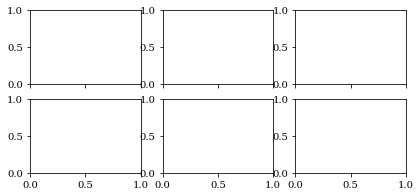

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as mticker

# --- Paths and case info ---
qssa_method_path = "../../figs/QSSA/SIM_results/"
rcce_method_path = "../../figs/RCCE_fortran/SIM_results/"
case_name = "case_NH3_counterflow_KAUST"

fig_dir = "../../figs/NH3"

mechanism = "Otomo_32s213r"
target_case_assemble = [
    'N_CF_1',
    # 'N_CF_2',
    # 'N_CF_3',
    # 'N_CF_4',
]

# --- Initialize subplots (2 rows and 3 columns) ---
fig, axs = plt.subplots(2, 3, figsize=(6.73, 3), sharex=True)

data_cols = [ 'Qdot', 'O', 'H', 'NO', 'NO2', 'NH2']

# --- Define color and marker parameters for QSSA and CE ---
# qssa_color = 'blue' #'#D55E00'   # Change this to try different colors
# rcce_color = 'red' #'#D55E00'     # Change this to try different colors
qssa_color = '#D55E00'  # Parameter for QSSA symbol edge color
rcce_color  = '#0072B2'   # Parameter for CE (RCCE) symbol edge color



qssa_marker = 'o'     # Marker for QSSA (circle)
rcce_marker = 's'     # Marker for CE (square)

# Define y-axis ranges for each data column (optional)
range_cols = {
    'Qdot': (1e6, 1e12),  # Example range for Qdot (HRR)
}

for j, target_case in enumerate(target_case_assemble):
    # Define file paths
    original_data_path = os.path.join("../../SIM_results", case_name,mechanism, target_case) + ".csv"
    rcce_data_path = os.path.join(rcce_method_path, case_name, target_case, "predicted_X.csv")
    qssa_data_path = os.path.join(qssa_method_path, case_name, target_case, mechanism,"predicted_X.csv")

    # Read data
    df_original = pd.read_csv(original_data_path)
    df_rcce = pd.read_csv(rcce_data_path)
    df_qssa = pd.read_csv(qssa_data_path)

    # Ensure T is a NumPy array
    T = df_original['T'].to_numpy()

    # Plot each variable in its corresponding subplot
    for i, col in enumerate(data_cols):
        row, col_num = divmod(i, 3)
        ax = axs[row, col_num]
        
        # Use a line plot for CVODE (original) data
        ax.plot(
            T[::3], 
            df_original[col].to_numpy()[::3],
            label=f'{target_case}', 
            linewidth=2, 
            alpha=1, 
            color='black'
        )
        
        # Scatter plot for QSSA
        ax.scatter(
            T[::1], 
            df_qssa[col].to_numpy()[::1],
            s=10, 
            alpha=1,
            marker=qssa_marker,
            facecolors='none',
            edgecolors=qssa_color,
            label=f'QSSA - {target_case}'
        )
        
        # Scatter plot for CE (RCCE)
        ax.scatter(
            T[::1], 
            df_rcce[col].to_numpy()[::1],
            s=10, 
            alpha=0.8,
            marker=rcce_marker,
            facecolors='none',
            edgecolors=rcce_color,
            label=f'RCCE - {target_case}'
        )

        # Set log scale for Qdot (HRR) only
        if col == 'Qdot':
            ax.set_yscale('log')
            ax.set_ylabel('HRR (J/kg/s)', fontsize=10)
            if col in range_cols:
                ax.set_ylim(range_cols[col])
        else:
            ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))
            ax.set_ylabel(col, fontsize=10)

        ax.set_xlim([1200, 2600])
        if row == 1:
            ax.set_xlabel('T(K)', fontsize=10)

# Custom legend using a line for CVODE and markers for QSSA and CE
legend_handles = [
    Line2D([0], [0], color='black', linewidth=2, label='CVODE'),
    Line2D([0], [0], marker=qssa_marker, color='w', label='QSSA',
           markerfacecolor='none', markeredgecolor=qssa_color, markersize=6, linestyle='None'),
    Line2D([0], [0], marker=rcce_marker, color='w', label='CE',
           markerfacecolor='none', markeredgecolor=rcce_color, markersize=6, linestyle='None'),
]

fig.legend(
    handles=legend_handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1), 
    ncol=3, 
    fontsize=10,
    frameon=Falseorp
)

plt.subplots_adjust(wspace=0.55, hspace=0.2, top=0.93, bottom=0.15)

os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "1D_CEQ_NH3_combine_Temperature_overall.pdf"), dpi=300)
plt.show()

# 这张图把真实值与重构值分开，在实验工况那里加上实验验证部分

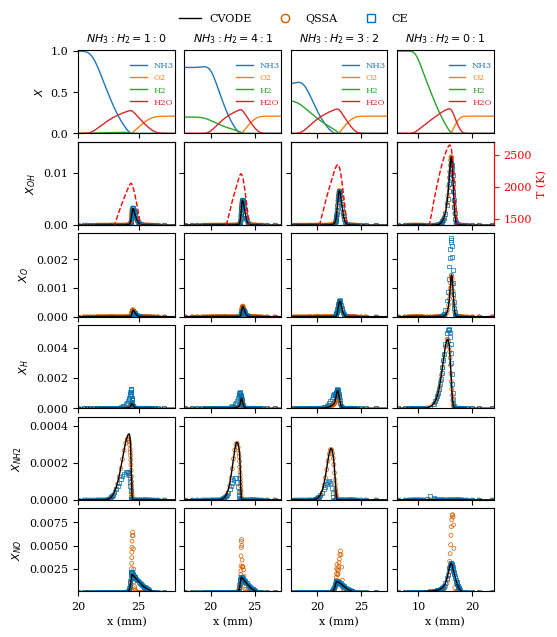

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Paths and case info ---
QSSA_path = "../../figs/QSSA/data/"
RCCE_path = "../../figs/RCCE_fortran/data/"
data_dir  = "../../data"
case_name = "case_NH3_counterflow"
# fig_dir = "../../figs/NH3_0Dignition"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times", "Times New Roman", "DejaVu Serif"]

# --- Plot styling arrays ---
line_arr   = ('-', '--', '-.', ':')
color_arr  = ('k', 'r', 'b', 'y', 'g', 'c', 'm')
symbol_arr = ('s', 'o', 'v', '^', '*')

target_case_assemble = [
    'N_CF_0',
    'N_CF_1',
    'N_CF_2',
    # 'N_CF_3',
    'N_CF_4',
    
    # 'N_CF_4',
    # 'N_CF_5',
    # 'N_CF_6',
    # 'N_CF_7',
    # 'N_CF_8',
]

x_range_assemble = [
    [20, 28],
    [17, 28],
    [17, 28],
    # [17, 28],
    [6, 24],
    # [17, 26],
    # [18, 35],
    # [22, 31],
    # [22, 31],
    # [22, 31],
]

# Corresponding phi labels for legend
name_case_assemble = [
    r'$NH_{3}:H_{2} = 1:0$',
    r'$NH_{3}:H_{2} = 4:1$',
    r'$NH_{3}:H_{2} = 3:2$',
    r'$NH_{3}:H_{2} = 0:1$',
]

# --- Top row species (left axis only) ---
top_row_left_cols = ['NH3', 'O2', 'H2', 'H2O']

# --- Lower rows ---
# 'CEM' will be in the second row (with T on a twin y-axis), then 'OH' and 'NO'
data_cols = ['OH', 'O', 'H', 'NH2', 'NO']
# data_cols = ['OH', 'O', 'H', 'NO','MF','CEM','Qdot']


# --- Parameters for scatter symbol edge colors ---
qssa_marker_edge_color = '#D55E00'  # Parameter for QSSA symbol edge color
ceq_marker_edge_color  = '#0072B2'   # Parameter for CE (RCCE) symbol edge color

T_range = [1400, 2700]  # Set the T range here

range_cols = {
    'CEM': (-5.5, 4.5),
    'OH': (0, 0.016),
    'O': (0, 0.0029),
    'H': (0, 0.0055),
    'NH2': (0, 4.5e-4),
    'NO': (1e-4, 0.009),
    'MF': (0, 1),
    'Qdot': (1e5, 2e10)
}

log_cols   = {
    'Qdot': True,
}

plt.rcParams.update({'font.size': 8})

# Create subplots: top row + one row for each entry in data_cols
fig, axs = plt.subplots(len(data_cols) + 1, 
                        len(target_case_assemble),
                        figsize=(5.73, 1.1 * (len(data_cols) + 1))
                       )

########################################################################
# 1) Plot top row: species on left axis only
########################################################################
first_row_handles = []
first_row_labels  = []

for col_idx, target_case in enumerate(target_case_assemble):
    # Read the original CSV
    original_data_path = os.path.join(data_dir, case_name, target_case) + ".csv"
    df_original = pd.read_csv(original_data_path)
    x = df_original['grid'].to_numpy() * 1000
    ax = axs[0, col_idx]

    # Plot the species in top_row_left_cols
    for col in top_row_left_cols:
        line, = ax.plot(
            x,
            df_original[col].to_numpy(),
            label=col,
            linestyle='-',
            linewidth=1.0
        )
        # Collect legend handles/labels only once (leftmost subplot)
        if col_idx == 0:
            first_row_handles.append(line)
            first_row_labels.append(col)

    # ax.set_xscale('log')
    ax.set_xlim(x_range_assemble[col_idx])
    ax.set_ylim(0,1.01)
    
    ax.set_xticklabels([])  # Remove x-axis tick labels in top row
    ax.set_title(name_case_assemble[col_idx], fontsize=8)

    if col_idx == 0:
        ax.set_ylabel(r'$X$', fontsize=8)

    # Remove y-ticks for columns > 0
    if col_idx != 0:
        ax.set_yticks([])

    # Removed the block that reassigns xticks in the top row

# Add a legend for the top row (species)
for col_idx in range(len(target_case_assemble)):
    ax = axs[0, col_idx]
    legend_1 = ax.legend(
        first_row_handles,
        first_row_labels,
        loc='upper center',
        ncol=1,
        fontsize=6,
        frameon=False,
        bbox_to_anchor=(0.76, 0.95)
    )
    # Sync color of legend text with the line color
    for text, line in zip(legend_1.get_texts(), legend_1.get_lines()):
        text.set_color(line.get_color())

########################################################################
# 2) Plot each of the lower rows: one row per data_col
#    Except that for 'CEM', we also plot 'T' on a twin y-axis.
########################################################################
for col_idx, target_case in enumerate(target_case_assemble):
    # CSV paths
    original_data_path = os.path.join(data_dir, case_name, target_case) + ".csv"
    rcce_data_path     = os.path.join(RCCE_path, case_name, target_case, "predicted_X.csv")
    qssa_data_path     = os.path.join(QSSA_path, case_name, target_case, "predicted_X.csv")

    df_original = pd.read_csv(original_data_path)
    df_rcce     = pd.read_csv(rcce_data_path)
    df_qssa     = pd.read_csv(qssa_data_path)

    x = df_original['grid'].to_numpy() * 1000

    for row_idx, col in enumerate(data_cols):
        ax = axs[row_idx + 1, col_idx]  # row_idx+1 because row=0 was top

        # Plot CVODE for col (line plot)
        cvode_values = df_original[col].to_numpy()
        ax.plot(
            x,
            cvode_values,
            linestyle='-',
            linewidth=1,
            color='black',
            label='CVODE' if (col_idx == 0 and row_idx == 0) else ""
        )

        # Plot QSSA for col (scatter)
        if col in df_qssa.columns:
            qssa_values = df_qssa[col].to_numpy()
            ax.scatter(
                x[::2],
                qssa_values[::2],
                s=8,
                alpha=1,
                linewidths=0.5,
                marker='o',
                facecolors='none',
                edgecolors=qssa_marker_edge_color,
                label='QSSA' if (col_idx == 0 and row_idx == 0) else ""
            )

        # Plot RCCE (labeled as CE) for col (scatter)
        if col in df_rcce.columns:
            rcce_values = df_rcce[col].to_numpy()
            ax.scatter(
                x[::2],
                rcce_values[::2],
                s=8,
                linewidths=0.5,
                alpha=1,
                marker='s',
                facecolors='none',
                edgecolors=ceq_marker_edge_color,
                label='RCCE' if (col_idx == 0 and row_idx == 0) else ""
            )

        # SPECIAL CASE: If col == 'CEM', also plot T on the right axis
        if col == 'OH':
            ax_right = ax.twinx()
            # Plot T from df_original (CVODE)
            T_cvode = df_original['T'].to_numpy()
            line_T, = ax_right.plot(
                x,
                T_cvode,
                linestyle='--',
                linewidth=1,
                color='red',   # or any color you want for T
                label='T (CVODE)' if (col_idx == 0 and row_idx == 0) else ""
            )
            # Optionally, if you have T in QSSA or RCCE, you can plot them similarly:
            if 'T' in df_qssa.columns:
                ax_right.scatter(
                    x[::2],
                    df_qssa['T'].to_numpy()[::25],
                    s=5,
                    alpha=1,
                    marker='o',
                    facecolors='none',
                    edgecolors='red',
                    label='T (QSSA)' if (col_idx == 0 and row_idx == 0) else ""
                )
            if 'T' in df_rcce.columns:
                ax_right.scatter(
                    x[::2],
                    df_rcce['T'].to_numpy()[::25],
                    s=5,
                    alpha=1,
                    marker='s',
                    facecolors='none',
                    edgecolors='#D55E00',
                    label='T (RCCE)' if (col_idx == 0 and row_idx == 0) else ""
                )

            # Set the T y-axis range
            ax_right.set_ylim(T_range)

            # Axis label for T only in the rightmost column (for cleanliness):
            if col_idx == len(target_case_assemble) - 1:
                ax_right.set_ylabel("T (K)", fontsize=8, color='red')
                # Color the spine and tick labels for consistency
                ax_right.spines['right'].set_color('red')
                ax_right.tick_params(axis='y', which='both', colors='red')
            else:
                ax_right.set_yticks([])

        # Format the left axis
        ax.set_xlim(x_range_assemble[col_idx])
        ax.set_ylim(range_cols[col])

        # Example: if col == 'Qdot', you might want log-scale in y
        if col == 'Qdot':
            ax.set_yscale('log')

        # Only bottom row shows the x-axis label
        if row_idx == len(data_cols) - 1:
            ax.set_xlabel("x (mm)", fontsize=8)

        # Y-axis label only in the first column
        if col_idx == 0:
            if col == 'Qdot':
                ax.set_ylabel('HRR (J/kg/s)', fontsize=8)
            else:
                ax.set_ylabel(r'$X_{' + col + '}$', fontsize=8)

        # Remove y-labels if not the first column
        if col_idx != 0:
            ax.set_yticklabels([])

        # Remove x-tick labels if not in the bottom-most row of data_cols
        if row_idx != len(data_cols) - 1:
            ax.set_xticklabels([])

########################################################################
# 3) Add a legend across the top for CVODE, QSSA, RCCE (CE)
########################################################################
legend_handles = [
    Line2D([0], [0],
           linestyle='-',
           linewidth=1.0,
           color='black',
           label='CVODE'),
    Line2D([0], [0],
           marker='o',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=qssa_marker_edge_color,
           label='QSSA'),
    Line2D([0], [0],
           marker='s',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=ceq_marker_edge_color,
           label='CE')
]

plt.subplots_adjust(top=0.93, right=0.85, wspace=0.1, hspace=0.1)

fig.legend(
    handles=legend_handles,
    loc='upper center',
    ncol=3,
    fontsize=8,
    frameon=False,
    bbox_to_anchor=(0.5, 1)
)

# Save the figure
fig.savefig("figs/1D_compact.pdf", dpi=300, bbox_inches='tight')
plt.show()

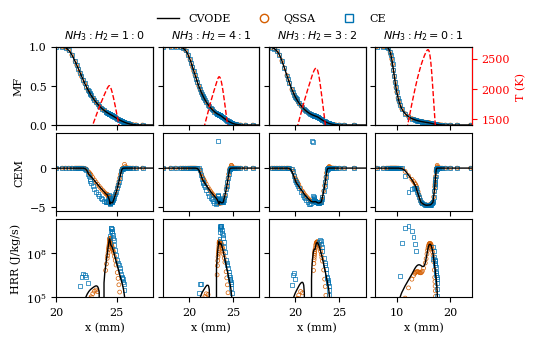

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Paths and case info ---
QSSA_path = "../../figs/QSSA/data/"
RCCE_path = "../../figs/RCCE_fortran/data/"
data_dir  = "../../data"
case_name = "case_NH3_counterflow"
# fig_dir = "../../figs/NH3_0Dignition"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times", "Times New Roman", "DejaVu Serif"]

# --- Plot styling arrays ---
line_arr   = ('-', '--', '-.', ':')
color_arr  = ('k', 'r', 'b', 'y', 'g', 'c', 'm')
symbol_arr = ('s', 'o', 'v', '^', '*')

target_case_assemble = [
    'N_CF_0',
    'N_CF_1',
    'N_CF_2',
    # 'N_CF_3',
    'N_CF_4',
    
    # 'N_CF_4',
    # 'N_CF_5',
    # 'N_CF_6',
    # 'N_CF_7',
    # 'N_CF_8',
]

x_range_assemble = [
    [20, 28],
    [17, 28],
    [17, 28],
    # [17, 28],
    [6, 24],
    # [17, 26],
    # [18, 35],
    # [22, 31],
    # [22, 31],
    # [22, 31],
]

# Corresponding phi labels for legend
name_case_assemble = [
    r'$NH_{3}:H_{2} = 1:0$',
    r'$NH_{3}:H_{2} = 4:1$',
    r'$NH_{3}:H_{2} = 3:2$',
    r'$NH_{3}:H_{2} = 0:1$',
]

# --- Top row species (left axis only) ---
top_row_left_cols = ['NH3', 'O2', 'H2', 'H2O']

# --- Lower rows ---
# 'CEM' will be in the second row (with T on a twin y-axis), then 'OH' and 'NO'
data_cols = ['MF', "CEM", 'Qdot']
# data_cols = ['OH', 'O', 'H', 'NO','MF','CEM','Qdot']


# --- Parameters for scatter symbol edge colors ---
qssa_marker_edge_color = '#D55E00'  # Parameter for QSSA symbol edge color
ceq_marker_edge_color  = '#0072B2'   # Parameter for CE (RCCE) symbol edge color

T_range = [1400, 2700]  # Set the T range here

range_cols = {
    'CEM': (-5.5, 4.5),
    'OH': (0, 0.016),
    'O': (0, 0.0029),
    'H': (0, 0.0055),
    'NH2': (0, 4.5e-4),
    'NO': (1e-4, 0.009),
    'MF': (0, 1),
    'Qdot': (1e5, 2e10)
}

log_cols   = {
    'Qdot': True,
}

plt.rcParams.update({'font.size': 8})

# Create subplots: top row + one row for each entry in data_cols
fig, axs = plt.subplots(len(data_cols), 
                        len(target_case_assemble),
                        figsize=(5.73, 1.1 * (len(data_cols)))
                       )

########################################################################
# 2) Plot each of the lower rows: one row per data_col
#    Except that for 'CEM', we also plot 'T' on a twin y-axis.
########################################################################
for col_idx, target_case in enumerate(target_case_assemble):
    # CSV paths
    original_data_path = os.path.join(data_dir, case_name, target_case) + ".csv"
    rcce_data_path     = os.path.join(RCCE_path, case_name, target_case, "predicted_X.csv")
    qssa_data_path     = os.path.join(QSSA_path, case_name, target_case, "predicted_X.csv")

    df_original = pd.read_csv(original_data_path)
    df_rcce     = pd.read_csv(rcce_data_path)
    df_qssa     = pd.read_csv(qssa_data_path)

    x = df_original['grid'].to_numpy() * 1000

    for row_idx, col in enumerate(data_cols):
        ax = axs[row_idx, col_idx]  # row_idx+1 because row=0 was top

        # Plot CVODE for col (line plot)
        cvode_values = df_original[col].to_numpy()
        ax.plot(
            x,
            cvode_values,
            linestyle='-',
            linewidth=1,
            color='black',
            label='CVODE' if (col_idx == 0 and row_idx == 0) else ""
        )

        # Plot QSSA for col (scatter)
        if col in df_qssa.columns:
            qssa_values = df_qssa[col].to_numpy()
            ax.scatter(
                x[::2],
                qssa_values[::2],
                s=8,
                alpha=1,
                linewidths=0.5,
                marker='o',
                facecolors='none',
                edgecolors=qssa_marker_edge_color,
                label='QSSA' if (col_idx == 0 and row_idx == 0) else ""
            )

        # Plot RCCE (labeled as CE) for col (scatter)
        if col in df_rcce.columns:
            rcce_values = df_rcce[col].to_numpy()
            ax.scatter(
                x[::2],
                rcce_values[::2],
                s=8,
                linewidths=0.5,
                alpha=1,
                marker='s',
                facecolors='none',
                edgecolors=ceq_marker_edge_color,
                label='RCCE' if (col_idx == 0 and row_idx == 0) else ""
            )

        # SPECIAL CASE: If col == 'CEM', also plot T on the right axis
        if col == 'MF':
            ax_right = ax.twinx()
            # Plot T from df_original (CVODE)
            T_cvode = df_original['T'].to_numpy()
            line_T, = ax_right.plot(
                x,
                T_cvode,
                linestyle='--',
                linewidth=1,
                color='red',   # or any color you want for T
                label='T (CVODE)' if (col_idx == 0 and row_idx == 0) else ""
            )
            # Optionally, if you have T in QSSA or RCCE, you can plot them similarly:
            if 'T' in df_qssa.columns:
                ax_right.scatter(
                    x[::2],
                    df_qssa['T'].to_numpy()[::25],
                    s=5,
                    alpha=1,
                    marker='o',
                    facecolors='none',
                    edgecolors='red',
                    label='T (QSSA)' if (col_idx == 0 and row_idx == 0) else ""
                )
            if 'T' in df_rcce.columns:
                ax_right.scatter(
                    x[::2],
                    df_rcce['T'].to_numpy()[::25],
                    s=5,
                    alpha=1,
                    marker='s',
                    facecolors='none',
                    edgecolors='#D55E00',
                    label='T (RCCE)' if (col_idx == 0 and row_idx == 0) else ""
                )

            # Set the T y-axis range
            ax_right.set_ylim(T_range)

            # Axis label for T only in the rightmost column (for cleanliness):
            if col_idx == len(target_case_assemble) - 1:
                ax_right.set_ylabel("T (K)", fontsize=8, color='red')
                # Color the spine and tick labels for consistency
                ax_right.spines['right'].set_color('red')
                ax_right.tick_params(axis='y', which='both', colors='red')
            else:
                ax_right.set_yticks([])

        # Format the left axis
        ax.set_xlim(x_range_assemble[col_idx])
        ax.set_ylim(range_cols[col])

        # Example: if col == 'Qdot', you might want log-scale in y
        if col == 'Qdot':
            ax.set_yscale('log')

        # Only bottom row shows the x-axis label
        if row_idx == len(data_cols) - 1:
            ax.set_xlabel("x (mm)", fontsize=8)

        # Y-axis label only in the first column
        if col_idx == 0:
            if col == 'Qdot':
                ax.set_ylabel('HRR (J/kg/s)', fontsize=8)
            else:
                ax.set_ylabel(col, fontsize=8)
        if row_idx ==0:
                ax.set_title(name_case_assemble[col_idx], fontsize=8)

        # Remove y-labels if not the first column
        if col_idx != 0:
            ax.set_yticklabels([])

        # Remove x-tick labels if not in the bottom-most row of data_cols
        if row_idx != len(data_cols) - 1:
            ax.set_xticklabels([])

########################################################################
# 3) Add a legend across the top for CVODE, QSSA, RCCE (CE)
########################################################################
legend_handles = [
    Line2D([0], [0],
           linestyle='-',
           linewidth=1.0,
           color='black',
           label='CVODE'),
    Line2D([0], [0],
           marker='o',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=qssa_marker_edge_color,
           label='QSSA'),
    Line2D([0], [0],
           marker='s',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=ceq_marker_edge_color,
           label='CE')
]

plt.subplots_adjust(top=0.87, right=0.85, wspace=0.1, hspace=0.1)

fig.legend(
    handles=legend_handles,
    loc='upper center',
    ncol=3,
    fontsize=8,
    frameon=False,
    bbox_to_anchor=(0.5, 1)
)

# Save the figure
fig.savefig("figs/1D_compact_marker.pdf", dpi=300, bbox_inches='tight')
plt.show()

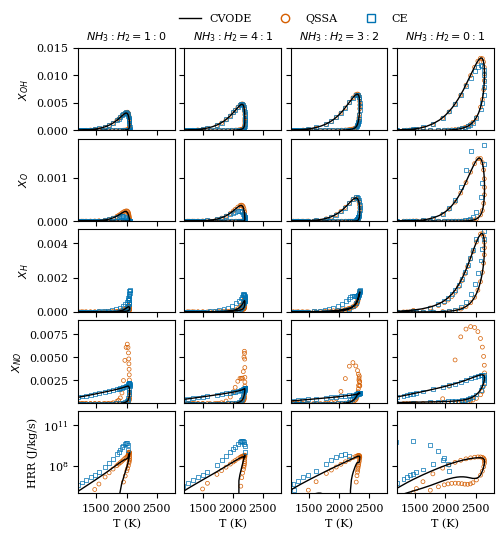

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times", "Times New Roman", "DejaVu Serif"]

# --- Paths and case info ---
QSSA_path = "../../figs/QSSA/data/"
RCCE_path = "../../figs/RCCE_fortran/data/"
data_dir  = "../../data"
case_name = "case_NH3_counterflow"

fig_dir = "../../figs/case_NH3_counterflow"

# --- Plot styling arrays ---
line_arr   = ('-', '--', '-.', ':')
color_arr  = ('k', 'r', 'b', 'y', 'g', 'c', 'm')
symbol_arr = ('s', 'o', 'v', '^', '*')


range_cols = {
    'CEM': (-5.5, 4.5),
    'O': (0, 0.0019),
    'H': (0, 0.0048),
    'OH': (0, 0.015),
    'NO': (1e-4, 0.009),
    'Qdot': (1e6, 1e12)
}



target_case_assemble = [
    'N_CF_0',
    'N_CF_1',
    'N_CF_2',
    # 'N_CF_3',
    'N_CF_4',
    
    # 'N_CF_4',
    # 'N_CF_5',
    # 'N_CF_6',
    # 'N_CF_7',
    # 'N_CF_8',
]

# Corresponding phi labels for legend
name_case_assemble = [
    r'$NH_{3}:H_{2} = 1:0$',
    r'$NH_{3}:H_{2} = 4:1$',
    r'$NH_{3}:H_{2} = 3:2$',
    r'$NH_{3}:H_{2} = 0:1$',
]

# --- Data columns to be plotted (against temperature) ---
data_cols = ['OH', 'O', 'H', 'NO', 'Qdot']

# --- Parameters for scatter symbol edge colors ---
qssa_marker_edge_color = '#D55E00'  # QSSA marker edge color
ceq_marker_edge_color  = '#0072B2'   # CE (RCCE) marker edge color

T_range = [1200, 2800]  # Updated Temperature range for x-axis

plt.rcParams.update({'font.size': 8})

# Create subplots: one row per data column
fig, axs = plt.subplots(len(data_cols), 
                        len(target_case_assemble),
                        figsize=(5.73, 1.1 * (len(data_cols)))
                       )

########################################################################
# Plot each row: one row per property (data_cols) against temperature T
########################################################################
for col_idx, target_case in enumerate(target_case_assemble):
    # CSV paths
    original_data_path = os.path.join(data_dir, case_name, target_case) + ".csv"
    rcce_data_path     = os.path.join(RCCE_path, case_name, target_case, "predicted_X.csv")
    qssa_data_path     = os.path.join(QSSA_path, case_name, target_case, "predicted_X.csv")

    df_original = pd.read_csv(original_data_path)
    df_rcce     = pd.read_csv(rcce_data_path)
    df_qssa     = pd.read_csv(qssa_data_path)

    # Use temperature from df_original as the x-axis variable
    T_vals = df_original['T'].to_numpy()

    for row_idx, col in enumerate(data_cols):
        ax = axs[row_idx, col_idx]  # No offset since top row is removed

        # Plot CVODE for col (line plot)
        cvode_values = df_original[col].to_numpy()
        ax.plot(
            T_vals,
            cvode_values,
            linestyle='-',
            linewidth=1,
            color='black',
            label='CVODE' if (col_idx == 0 and row_idx == 0) else ""
        )

        # Plot QSSA for col (scatter)
        if col in df_qssa.columns:
            qssa_values = df_qssa[col].to_numpy()
            ax.scatter(
                T_vals[::2],
                qssa_values[::2],
                s=8,
                alpha=1,
                linewidths=0.5,
                marker='o',
                facecolors='none',
                edgecolors=qssa_marker_edge_color,
                label='QSSA' if (col_idx == 0 and row_idx == 0) else ""
            )

        # Plot RCCE (labeled as CE) for col (scatter)
        if col in df_rcce.columns:
            rcce_values = df_rcce[col].to_numpy()
            ax.scatter(
                T_vals[::2],
                rcce_values[::2],
                s=8,
                linewidths=0.5,
                alpha=1,
                marker='s',
                facecolors='none',
                edgecolors=ceq_marker_edge_color,
                label='RCCE' if (col_idx == 0 and row_idx == 0) else ""
            )

        ax.set_xlim(T_range)
        ax.set_ylim(range_cols[col])

        if col == 'Qdot':
            ax.set_yscale('log')

        # Only the bottom row shows the x-axis label
        if row_idx == len(data_cols) - 1:
            ax.set_xlabel("T (K)", fontsize=8)

  
        # Set the y-axis label on the first column
        if col_idx == 0:
            if col == 'Qdot':
                ax.set_ylabel('HRR (J/kg/s)', fontsize=8)
            else:
                ax.set_ylabel(r'$X_{' + col + '}$', fontsize=8)
            
        if row_idx ==0:
                ax.set_title(name_case_assemble[col_idx], fontsize=8)

        # Remove y-tick labels for non-first columns
        if col_idx != 0:
            ax.set_yticklabels([])

        # Remove x-tick labels for all but the bottom row
        if row_idx != len(data_cols) - 1:
            ax.set_xticklabels([])

########################################################################
# Add a legend across the top for CVODE, QSSA, and RCCE (labeled as CE)
########################################################################
legend_handles = [
    Line2D([0], [0],
           linestyle='-',
           linewidth=1.0,
           color='black',
           label='CVODE'),
    Line2D([0], [0],
           marker='o',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=qssa_marker_edge_color,
           label='QSSA'),
    Line2D([0], [0],
           marker='s',
           linestyle='None',
           markerfacecolor='none',
           markeredgecolor=ceq_marker_edge_color,
           label='CE')
]

plt.subplots_adjust(top=0.92, right=0.85, wspace=0.1, hspace=0.1)

fig.legend(
    handles=legend_handles,
    loc='upper center',
    ncol=3,
    fontsize=8,
    frameon=False,
    bbox_to_anchor=(0.5, 1)
)

# Save the figure with the specified filename
fig.savefig("1D_CEQ_NH3_combine_Temperature_overall.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Eigen Plot

Figure saved to figs/NH3/eigens_over_space.png


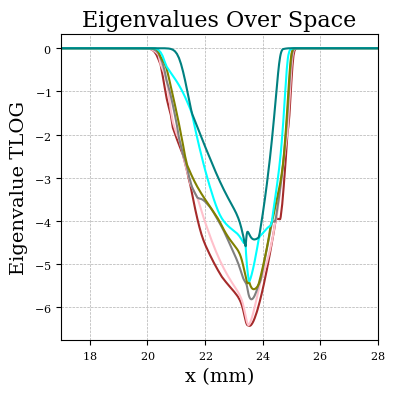

In [6]:
# Define the target cases you want to plot
target_case_assemble = [
    'eigened_N_CF_1',
]

# Define corresponding x-axis ranges for each case (in mm)
x_range_assemble = [
    [17, 28],
    # Add ranges for additional cases if needed
]

# Define the directory name where your CSV files are located
case_name = "case_NH3_counterflow"  # Ensure this matches your directory structure

# Define colors for eigenvalues (extend the list if more colors are needed)
color_arr = ['k','r','b','m','y','g', 'c', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'teal']

# Initialize a single subplot for eigenvalues
fig, ax = plt.subplots(figsize=(4.7, 4))

# Loop through each target case
for j, target_case in enumerate(target_case_assemble):
    # Construct the full path to the CSV file
    original_data_path = os.path.join("../../data", case_name, target_case) + ".csv"

    # Check if the file exists
    if not os.path.exists(original_data_path):
        print(f"File {original_data_path} does not exist. Skipping.")
        continue

    # Read the CSV data into a DataFrame
    df_original = pd.read_csv(original_data_path)

    # Extract the spatial coordinate 'x' (assuming it's labeled 'grid' and converting to mm)
    if 'grid' in df_original.columns:
        x = df_original['grid'].to_numpy() * 1000  # Convert to mm if 'grid' is in meters
    else:
        raise ValueError(f"'grid' column not found in {original_data_path}. Please check the column name.")

    # Plot each eigenvalue (eigen1 to eigen15)
    for eigen_num in range(10, 16):
        eigen_col = f'eigen{eigen_num}'
        if eigen_col in df_original.columns:
            # Plot the eigenvalue
            ax.plot(
                x,
                df_original[eigen_col],
                label=f'{eigen_col}' if j == 0 else "",  # Label only once for legend clarity
                color=color_arr[eigen_num - 1],  # Cycle through colors
                linestyle='-',
                linewidth=1.5
            )
        else:
            print(f"Warning: {eigen_col} not found in {original_data_path}.")

    # Optionally, set axis limits using x_range_assemble
    if j < len(x_range_assemble):
        ax.set_xlim(x_range_assemble[j])

# Formatting the plot
ax.set_xlabel('x (mm)', fontsize=14)
ax.set_ylabel('Eigenvalue TLOG', fontsize=14)
ax.set_title('Eigenvalues Over Space', fontsize=16)

# Configure tick formatting for better readability
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_powerlimits((-2, 2))

# Create a custom legend
# Since all eigenvalues share the same labels across cases, we can use a single legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), title='Eigenvalues', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent clipping of legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the figure
fig_dir = "figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "eigens_over_space.png"), dpi=300, bbox_inches='tight')
print(f"Figure saved to {os.path.join(fig_dir, 'eigens_over_space.png')}")

# Display the plot
plt.show(block=False)


Figure saved to figs/NH3/sens_for_N_CF_1_top_10.pdf


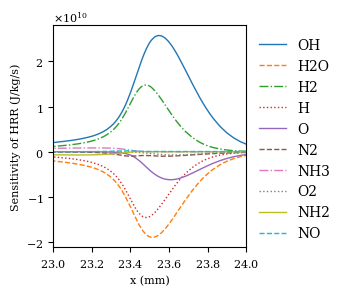

In [7]:
"""
Plots the top 10 sensitivities for species in 'N_CF_1' and QSSA & RCCE predictions of a specified species against space
in a single plot for the 'N_CF_1' case.

Parameters:
- species_to_plot (str): The species to plot predictions for (e.g., 'H', 'O'). Default is 'H'.
"""
qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE/data/"

# Apply Seaborn v0.8 style
# sns.set_style("darkgrid")  # You can choose 'whitegrid', 'darkgrid', 'white', 'dark', 'ticks'

# Define the target case (only 'N_CF_1' in this case)
target_case_assemble = ['N_CF_1']

# Define corresponding x-axis ranges for the target case (in mm)
x_range_assemble = [[23, 24]]  # Range for sensitivityed_eigened_N_CF_1

# Define the directory name where your CSV files are located
case_name = "case_NH3_counterflow"  # Ensure this matches your directory structure

# Define colors for plotting sensitivities (extend the list if more colors are needed)
sensitivity_color_arr = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
]

# Define markers for different cases (Retained as per instruction)
symbol_arr = ('s', 'o', 'v', '^')  # Different markers for different cases

# Define line styles for different species
line_arr = ('-', '--', '-.', ':')  # Different line styles

# Corresponding phi labels for legend
name_case_assemble = [
    r'$NH_{3}:H_{2} = 4:1$',
    r'$NH_{3}:H_{2} = 3:2$',
    r'$NH_{3}:H_{2} = 1:1$',
]

# Initialize a Series to accumulate species data
all_species_data = pd.Series(dtype=float)
# Create a figure and primary axis
fig, ax_sens = plt.subplots(figsize=(3.5, 3))  # Adjust figsize as needed

# Loop through each target case (in this case, only 'N_CF_1')
for j, target_case in enumerate(target_case_assemble):
    # Construct the full path to the sensitivity CSV file
    original_data_path = os.path.join("../../data", case_name, "sensitivityed_eigened_" + target_case) + ".csv"

    # Check if the file exists
    if not os.path.exists(original_data_path):
        print(f"File {original_data_path} does not exist. Skipping sensitivity plot for this case.")
        ax_sens.set_visible(False)
        continue
    else:
        # Read the CSV data into a DataFrame
        df_original = pd.read_csv(original_data_path)

        # Extract the spatial coordinate 'x' (assuming it's labeled 'grid' and converting to mm)
        if 'grid' in df_original.columns:
            x = df_original['grid'].to_numpy() * 1000  # Convert to mm if 'grid' is in meters
        else:
            raise ValueError(f"'grid' column not found in {original_data_path}. Please check the column name.")

        # Identify sensitivity columns (columns starting with 'sensitivity_')
        sensitivity_cols = [col for col in df_original.columns if col.startswith('sensitivity_')]

        if not sensitivity_cols:
            print(f"No sensitivity columns found in {original_data_path}. Skipping sensitivity plot for this case.")
            ax_sens.set_visible(False)
            continue
        else:
            # Create a dictionary to store species names and their max sensitivities
            sensitivity_dict = {}

            # Loop through each sensitivity column to extract max sensitivity values
            for sensitivity_col in sensitivity_cols:
                species_name = sensitivity_col.replace('sensitivity_', '')  # Extract species name from column name
                max_sensitivity = df_original[sensitivity_col].abs().max()  # Get the max absolute sensitivity value
                sensitivity_dict[species_name] = max_sensitivity

            # Sort species by the absolute max sensitivity values and select the top 10
            top_10_species = sorted(sensitivity_dict.items(), key=lambda x: x[1], reverse=True)[:10]

            # Plot the top 10 sensitivity lines
            for idx, (species_name, _) in enumerate(top_10_species):
                sensitivity_col = f'sensitivity_{species_name}'  # Construct the column name for the species

                # Assign a line style from line_arr
                line_style = line_arr[idx % len(line_arr)]

                # Plot the sensitivity with unique line styles and no markers
                ax_sens.plot(
                    x,
                    df_original[sensitivity_col],
                    label=species_name,
                    color=sensitivity_color_arr[idx % len(sensitivity_color_arr)],
                    linestyle=line_style,  # Different line styles for different species
                    linewidth=1
                    # Removed marker-related parameters
                )

            # Optionally, set axis limits using x_range_assemble
            if j < len(x_range_assemble):
                ax_sens.set_xlim(x_range_assemble[j])

            # Formatting the sensitivity subplot
            ax_sens.set_xlabel('x (mm)', fontsize=8, color='black')
            ax_sens.set_ylabel('Sensitivity of HRR (J/kg/s)', fontsize=8, color='black')

            # Configure tick formatting for better readability
            ax_sens.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax_sens.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax_sens.yaxis.get_major_formatter().set_powerlimits((-2, 2))

            # Set tick label font size to 8 for both axes and color to black
            ax_sens.tick_params(axis='both', labelsize=8, colors='black')

            # # Change the color of the left y-axis spines to lightgray
            # ax_sens.spines['left'].set_color('lightgray')
            # ax_sens.yaxis.label.set_color('lightgray')  # Set y-axis label color to lightgray
            # ax_sens.spines['right'].set_color('gray')  # Optional: Dim the right spine if not used

            # Access the offset text (scientific notation exponents) and set their font size to 8
            # For x-axis
            if ax_sens.xaxis.offsetText:
                ax_sens.xaxis.offsetText.set_fontsize(8)
                ax_sens.xaxis.offsetText.set_color('black')  # Ensure visibility
            # For y-axis
            if ax_sens.yaxis.offsetText:
                ax_sens.yaxis.offsetText.set_fontsize(8)
                ax_sens.yaxis.offsetText.set_color('black')  # Match y-axis color

# Add legend for the top 10 species outside the plot to the right without frame
ax_sens.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Adjust layout to prevent clipping of legends and titles
plt.tight_layout()

# Save the figure
fig_dir = "figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "sens_for_N_CF_1_top_10.pdf"), dpi=300, bbox_inches='tight')
print(f"Figure saved to {os.path.join(fig_dir, 'sens_for_N_CF_1_top_10.pdf')}")

# Display the plot
plt.show()

Figure saved to ../../figs/NH3/multi_gibbs_QSSA_RCCE_over_space.png


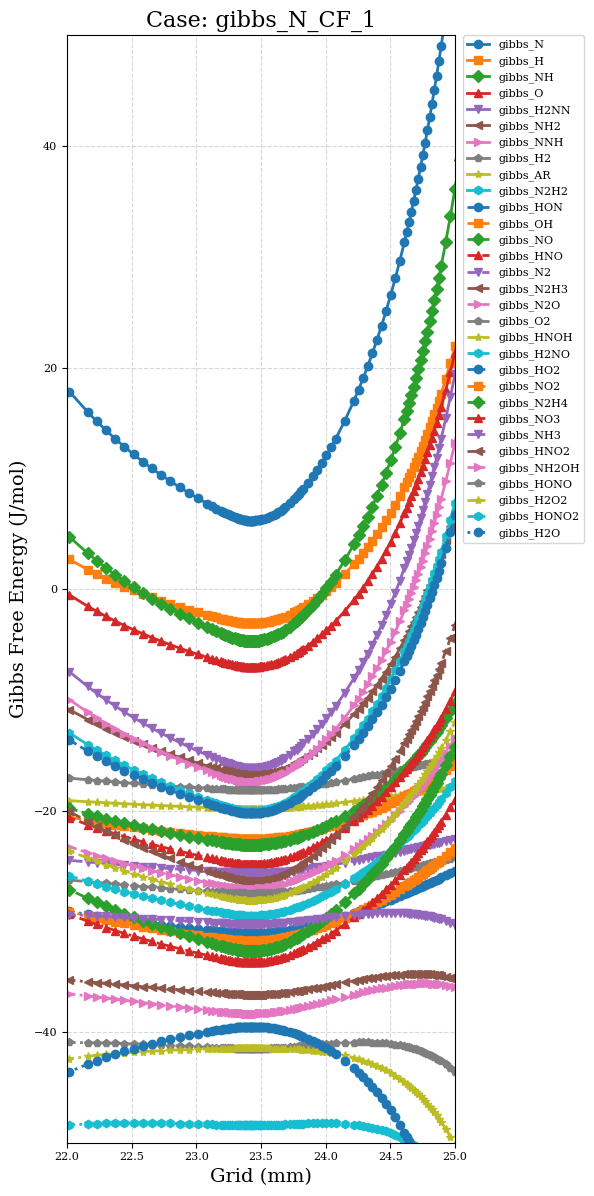

In [8]:
from itertools import cycle, product
"""
Plots all Gibbs terms (columns starting with 'gibbs') against the spatial grid for the target case 'gibbs_N_CF_1'.

The function reads the specified CSV file, identifies all 'gibbs_*' columns, sorts them based on their minimum Gibbs energy
in decreasing order, and plots each term with unique color and line style combinations. The legend is organized in a vertical
column for clarity.

The final plot is saved as 'multi_gibbs_QSSA_RCCE_over_space.png' in the 'figs/NH3' directory.
"""

from itertools import cycle, product  # Moved inside the function to match user's original code structure
qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE/data/"
# Define the target case you want to plot
target_case_assemble = [
    'gibbs_N_CF_1',
    # 'gibbs_N_CF_2',
    # 'gibbs_N_CF_3'
]

# Define corresponding x-axis ranges for each case (in mm)
x_range_assemble = [
    [22, 25],  # Range for gibb_N_CF_1
    # [21, 24],  # Range for gibb_N_CF_2
    # [20, 23],  # Range for gibb_N_CF_3
]


# Initialize subplots
num_cases = len(target_case_assemble)
fig, axes = plt.subplots(nrows=1, ncols=num_cases, figsize=(6 * num_cases, 12))  # Adjusted figsize

# If only one subplot, make axes iterable
if num_cases == 1:
    axes = [axes]

# Define line styles and markers for variety
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
style_combinations = list(product(line_styles, markers))
style_cycle = cycle(style_combinations)

# Loop through each target case and its corresponding subplot
for j, (target_case, x_range) in enumerate(zip(target_case_assemble, x_range_assemble)):
    ax = axes[j]  # Current subplot axis

    # Construct the path to the CSV file for the current case
    csv_file = os.path.join('../../data', case_name, f"{target_case}.csv")

    # Check if the CSV file exists
    if not os.path.isfile(csv_file):
        print(f"Warning: CSV file {csv_file} does not exist. Skipping this case.")
        continue

    # Read the CSV file into a DataFrame
    try:
        data = pd.read_csv(csv_file)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")
        continue

    # Ensure 'grid' column exists
    if 'grid' not in data.columns:
        print(f"Error: 'grid' column not found in {csv_file}. Skipping this case.")
        continue

    # Dynamically identify all columns that start with 'gibbs'
    gibbs_terms = [col for col in data.columns if col.startswith('gibbs')]

    if not gibbs_terms:
        print(f"Warning: No 'gibbs' columns found in {csv_file}. Skipping this case.")
        continue

    # Calculate the minimum Gibbs energy for each term
    gibbs_min_values = {}
    for term in gibbs_terms:
        min_val = data[term].min()
        gibbs_min_values[term] = min_val

    # Sort the gibbs_terms based on decreasing minimum Gibbs energy
    sorted_gibbs_terms = sorted(gibbs_terms, key=lambda x: gibbs_min_values[x], reverse=True)

    # Plot each Gibbs term with unique color and line style
    for term in sorted_gibbs_terms:
        line_style, marker = next(style_cycle)
        ax.plot(
            data['grid'] * 1000,  # Convert grid to mm if it's in meters
            data[term],
            label=term,
            linestyle=line_style,
            marker=marker,
            linewidth=2
        )

    # Set subplot title and labels
    ax.set_title(f"Case: {target_case}", fontsize=16)
    ax.set_xlabel("Grid (mm)", fontsize=14)
    ax.set_ylim([-50, 50])

    if j == 0:
        ax.set_ylabel("Gibbs Free Energy (J/mol)", fontsize=14)  # Replace 'J/mol' with actual units if different

    # Set x-axis limits based on x_range_assemble
    ax.set_xlim(x_range)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    # Move the legend outside to the right
    ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.tight_layout()
# plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust right margin to accommodate legend

# Save the figure
fig_dir = "../../figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
fig_path = os.path.join(fig_dir, "multi_gibbs_QSSA_RCCE_over_space.png")
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {fig_path}")

# Display the plot
plt.show()

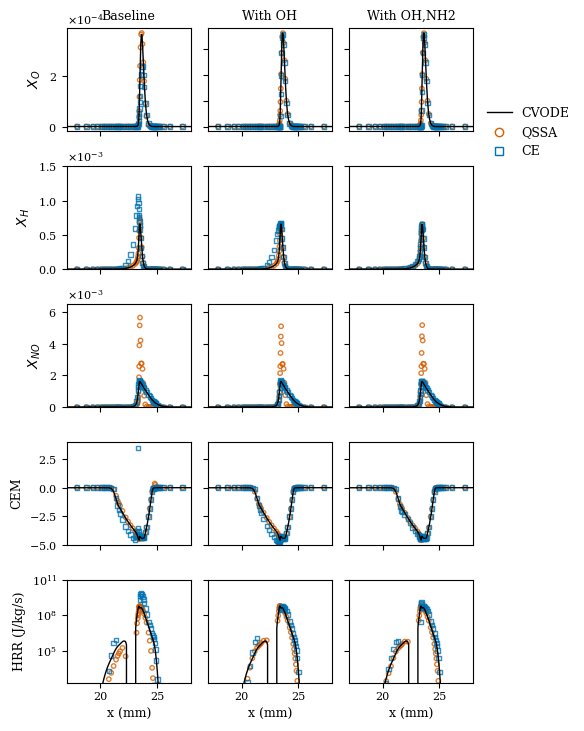

In [21]:
# Define target cases representing different species addition situations

qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE_fortran/data/"

base_case_data_name = 'case_NH3_counterflow'
target_case_assemble = [
    'case_NH3_counterflow_ori',    # Baseline case
    'case_NH3_counterflow_OH',    # Baseline case
    'case_NH3_counterflow_OH_NH2',      # Addition of H
    # 'case_NH3_counterflow_OH_NH2_NH',      # Addition of H
    
]

original_data_path_base = "../../data"  # Assuming original data is stored here

# Define line styles, colors, and markers
line_arr = ('-', '--', '-.', ':')
color_arr = ('k', 'r', 'b', 'y', 'g', 'c', 'm')
symbol_arr = ('s', 'o', 'v', '^', '*')

# Corresponding labels for legend
name_case_assemble = [
    "Baseline",      # Baseline case
    "With OH",      # Baseline case
    "With OH,NH2",             # Addition of H
    # "With OH,NH2,NH",             # Addition of H
]

# Define data columns for the lower rows
data_cols = ['O','H', 'NO', 'CEM', 'Qdot']

# Define y-axis ranges for specific columns
range_cols = {
            'H': (0,1.5e-3),
            'CEM': (-5, 4),
            # 'Qdot': (2e6, 5e10)
            'NO':(0,0.0065),
            'Qdot': (2e2, 1e11)
            # 
            }

# Define which columns should use a logarithmic scale
log_cols = {'Qdot': True}

# Update global font size for plots
plt.rcParams.update({'font.size': 8})

# Create subplots: len(data_cols) rows and len(target_case_assemble) columns
fig, axs = plt.subplots(len(data_cols), len(target_case_assemble),
                        figsize=(5.73, 1.5 * len(data_cols))
                        )

# Ensure axs is a 2D array even if there's only one row or column
if len(data_cols) == 1:
    axs = axs.reshape(1, -1)
if len(target_case_assemble) == 1:
    axs = axs.reshape(-1, 1)

# Loop through cases for the lower rows
for col_idx, target_case in enumerate(target_case_assemble):
    # Define subcase
    subcase = "N_CF_1"

    # File paths for the current case
    original_data_file = os.path.join(original_data_path_base, base_case_data_name, f"{subcase}.csv")
    rcce_data_file = os.path.join(rcce_method_path, target_case, subcase, "predicted_X.csv")
    qssa_data_file = os.path.join(qssa_method_path, target_case, subcase, "predicted_X.csv")

    # Read original data
    try:
        df_original = pd.read_csv(original_data_file)
    except FileNotFoundError:
        print(f"Original data file not found: {original_data_file}")
        continue

    # Read QSSA data
    try:
        df_qssa = pd.read_csv(qssa_data_file)
    except FileNotFoundError:
        print(f"QSSA data file not found: {qssa_data_file}")
        df_qssa = pd.DataFrame()  # Create empty DataFrame to avoid errors

    # Read RCCE data
    try:
        df_rcce = pd.read_csv(rcce_data_file)
    except FileNotFoundError:
        print(f"RCCE data file not found: {rcce_data_file}")
        df_rcce = pd.DataFrame()  # Create empty DataFrame to avoid errors

    # Ensure 'grid' column exists
    if 'grid' not in df_original.columns:
        print(f"'grid' column not found in {original_data_file}")
        continue

    x = df_original['grid'].to_numpy() * 1000  # Convert to mm

    for row_idx, col in enumerate(data_cols):
        ax = axs[row_idx, col_idx]  # Access the correct subplot

        # Plot CVODE (original) as a solid black line
        if col not in df_original.columns:
            print(f"Column '{col}' not found in {original_data_file}")
            continue
        cvode_values = df_original[col].to_numpy()
        # Removed multiplication for 'O' and 'H'

        ax.plot(
            x,
            cvode_values,
            linestyle='-',       # solid line
            linewidth=1.0,        # slightly thicker
            color='black',        # black line
            label='CVODE' if (col_idx == 0 and row_idx == 0) else ""
        )

        # Plot QSSA (predicted) as orange, open circles
        if not df_qssa.empty and col in df_qssa.columns:
            qssa_values = df_qssa[col].to_numpy()
            # Removed multiplication for 'O' and 'H'

            ax.scatter(
                x[::3],
                qssa_values[::3],
                s=10,                # larger markers than default
                alpha=0.8,
                marker='o',         # circle
                edgecolors='#D55E00',   # orange outline
                facecolors='none',      # open circle
                label='QSSA' if (col_idx == 0 and row_idx == 0) else ""
            )
        else:
            ax.scatter(
                x,
                np.full_like(x, np.nan),
                s=8,
                alpha=0.8,
                marker='o',
                edgecolors='#D55E00',
                facecolors='none',
                label='QSSA' if (col_idx == 0 and row_idx == 0) else ""
            )

        # Plot RCCE (predicted) as blue squares
        if not df_rcce.empty and col in df_rcce.columns:
            rcce_values = df_rcce[col].to_numpy()
            # Removed multiplication for 'O' and 'H'

            ax.scatter(
                x[::3],
                rcce_values[::3],
                s=10,
                alpha=0.8,
                marker='s',         # square
                edgecolors='#0072B2',   # blue outline
                facecolors='none',      # open square
                label='RCCE' if (col_idx == 0 and row_idx == 0) else ""
            )
        else:
            ax.scatter(
                x,
                np.full_like(x, np.nan),
                s=2,
                alpha=0.8,
                marker='s',
                edgecolors='#0072B2',
                facecolors='none',
                label='CE' if (col_idx == 0 and row_idx == 0) else ""
            )

        # Set x-axis limits
        ax.set_xlim([17, 28])
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
        ax.yaxis.get_major_formatter().set_powerlimits((-3, 3))
        
        # Set x-axis label only for the bottom row
        if row_idx + 1 == len(data_cols):
            ax.set_xlabel("x (mm)", fontsize=9)

        # Set y-scale based on `log_cols`
        if log_cols.get(col, False):
            ax.set_yscale('log')
            if col in range_cols:
                ax.set_ylim(range_cols[col])

        # Set y-axis limits if specified
        if col in range_cols:
            ax.set_ylim(range_cols[col])

        # Set y-axis labels for the first column
        if col_idx == 0:
            if col == 'Qdot':
                ax.set_ylabel('HRR (J/kg/s)', fontsize=9)  # Update label for Qdot
            elif col == 'CEM':
                ax.set_ylabel('CEM', fontsize=9)  # Update label for Qdot
            else:
                ax.set_ylabel(r'$X_{' + col + '}$', fontsize=10)
        else:
            ax.set_yticklabels([])  # Remove y-axis labels for non-first columns

                # Remove x-axis labels for non-bottom rows
        if row_idx != len(data_cols) - 1:
            ax.set_xticklabels([])
        
# Add column titles above each column of subplots using ax.set_title
for col_idx, title in enumerate(name_case_assemble):
    # Set title on the first row's subplot in the column
    axs[0, col_idx].set_title(title, fontsize=9)

# Define legend handles
legend_handles = [
    Line2D([0], [0],
            linestyle='-',
            linewidth=1.0,
            color='black',
            label='CVODE'
            ),
    Line2D([0], [0],
            marker='o',
            linestyle='None',
            markerfacecolor='none',
            markeredgecolor='#D55E00',
            alpha=1,
            label='QSSA'
            ),
    Line2D([0], [0],
            marker='s',
            linestyle='None',
            markerfacecolor='none',
            markeredgecolor='#0072B2',
            alpha=1,
            label='CE'
            )
]

# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.85, right=0.8, wspace=0.001, hspace=0.001)
plt.tight_layout(rect=[0, 0, 0.85, 0.98])  # Adjusted to leave space for titles and legend

# Add the legend on top, centered horizontally below the column titles
fig.legend(
    handles=legend_handles,
    loc='upper center',
    ncol=1,
    fontsize=9,
    frameon=False,
    bbox_to_anchor=(0.925, 0.85)  # Adjusted to prevent overlap
)

# Save the figure
os.makedirs("../../figs", exist_ok=True)  # Ensure the figs directory exists
fig.savefig("../../figs/plot_species_addition_CEM_Qdot.png", dpi=300, bbox_inches='tight')
fig.savefig("../../figs/plot_species_addition_CEM_Qdot.pdf", dpi=300, bbox_inches='tight')

plt.show()


Info: Skipping element counting for species 'H2O' in Basic case.
Info: Skipping element counting for species 'NH3' in Basic case.
Info: Skipping element counting for species 'O2' in Basic case.
Info: Skipping element counting for species 'N2' in Basic case.
Info: Skipping element counting for species 'H2' in Basic case.
Info: Skipping element counting for species 'H2O' in RCCE case.
Info: Skipping element counting for species 'NH3' in RCCE case.
Info: Skipping element counting for species 'O2' in RCCE case.
Info: Skipping element counting for species 'N2' in RCCE case.
Info: Skipping element counting for species 'H2' in RCCE case.
Figure saved to figs/NH3/cumulative_element_fractions_comparison_basic_rcce.png and figs/NH3/cumulative_element_fractions_comparison_basic_rcce.pdf


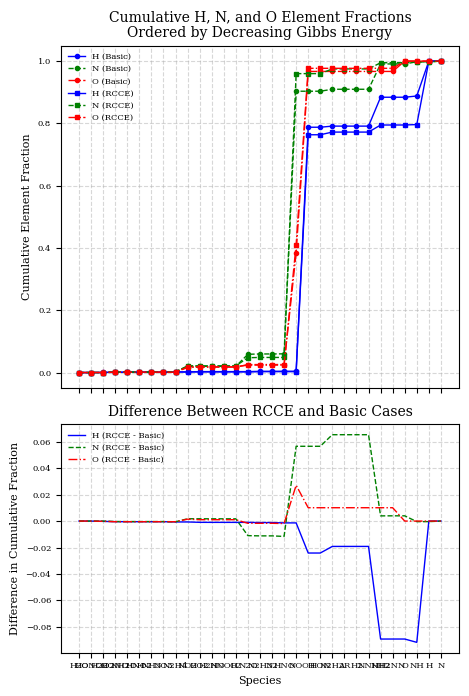

In [10]:
import os 
import pandas as pd 
import re

# Define target cases representing different species addition situations
qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE/data/"



# Define the Basic case CSV file path
basic_case_name = "../../data/case_NH3_counterflow/gibbs_N_CF_1.csv" 

# Define RCCE case CSV file path
# rcce_case_name = "figs/RCCE_fortran/data/case_NH3_counterflow_ori/N_CF_1/predicted_X.csv"
rcce_case_name = "../../figs/RCCE_fortran/data/case_NH3_counterflow/N_CF_1/predicted_X.csv"


# Check if the Basic case CSV file exists
if not os.path.isfile(basic_case_name):
    print(f"Error: Basic case CSV file '{basic_case_name}' does not exist.")


# Read the Basic case CSV data
basic_data = pd.read_csv(basic_case_name)
basic_gibbs_terms = [col for col in basic_data.columns if col.startswith('gibbs')]

if not basic_gibbs_terms:
    print(f"Warning: No 'gibbs' columns found in {basic_case_name}. Skipping this case.")

# Calculate the minimum Gibbs energy for each term in the Basic case
basic_gibbs_min_values = {term: basic_data[term].min() for term in basic_gibbs_terms}

# Sort the gibbs_terms based on decreasing minimum Gibbs energy (Basic Case)
sorted_gibbs_terms = sorted(basic_gibbs_terms, key=lambda x: basic_gibbs_min_values[x], reverse=False)

# Define the elements to track
elements = ['H', 'N', 'O']

# Define species to skip (exclude from element counting)
skipped_species = ['H2', 'N2', 'O2', 'NH3', 'H2O']

# Function to count the number of specified atoms in a species formula
def count_atoms(formula, elements):
    """
    Counts the number of specified atoms in a chemical formula.
    
    Parameters:
        formula (str): The chemical formula (e.g., 'H2O', 'NH3').
        elements (list): List of element symbols to count (e.g., ['H', 'N', 'O']).
    
    Returns:
        dict: Dictionary with element symbols as keys and their counts as values.
    """
    counts = {element: 0 for element in elements}
    for element in elements:
        # Regex pattern to find element followed by optional digits
        pattern = rf'{element}(\d*)'
        matches = re.findall(pattern, formula)
        for match in matches:
            if match == '':
                counts[element] += 1
            else:
                counts[element] += int(match)
    return counts

# Define a dictionary to hold data for each case
cases = {
    'Basic': basic_case_name,
    'RCCE': rcce_case_name
}

# Initialize a nested dictionary to store cumulative fractions for each case and element
cumulative_fractions = {
    'Basic': {'H': None, 'N': None, 'O': None},
    'RCCE': {'H': None, 'N': None, 'O': None}
}

# Initialize species names based on the sorted_gibbs_terms
species_names = [term.replace('gibbs_', '') for term in sorted_gibbs_terms]

# Iterate through each case to compute cumulative fractions
for case_label, case_path in cases.items():
    # Check if the case CSV file exists
    if not os.path.isfile(case_path):
        print(f"Error: {case_label} case CSV file '{case_path}' does not exist. Skipping this case.")
        continue
    
    # Read the case CSV data
    case_data = pd.read_csv(case_path)
    case_gibbs_terms = [col for col in case_data.columns if col.startswith('gibbs')]
    
    # Verify that the case has the required gibbs_terms
    missing_terms = set(sorted_gibbs_terms) - set(case_gibbs_terms)
    if missing_terms:
        print(f"Warning: The following 'gibbs' columns are missing in {case_label} case '{case_path}': {missing_terms}")
    
    # Initialize lists to store element contributions
    H_contributions = []
    N_contributions = []
    O_contributions = []
    
    # Iterate through the sorted species and calculate element contributions
    for term in sorted_gibbs_terms:
        # Extract species formula by removing the 'gibbs_' prefix
        species_formula = term.replace('gibbs_', '')
        
        if species_formula in skipped_species:
            # Skip counting elements for this species
            H_i = 0
            N_i = 0
            O_i = 0
            print(f"Info: Skipping element counting for species '{species_formula}' in {case_label} case.")
        else:
            # Count the number of H, N, O atoms in the species
            atom_counts = count_atoms(species_formula, elements)
            n_H = atom_counts['H']
            n_N = atom_counts['N']
            n_O = atom_counts['O']
            
            # Get the fraction of the species from the data
            # Assuming the fraction is represented by the column corresponding to the species
            if species_formula in case_data.columns:
                f_i = case_data[species_formula].sum()  # Sum over all spatial points or relevant axis
            elif term in case_data.columns:
                # If species_fraction is not directly available, use the 'gibbs_*' column
                f_i = case_data[term].sum()
                print(f"Warning: '{species_formula}' not found in {case_label} case data columns. Using '{term}' instead.")
            else:
                # If neither is available, set fraction to zero and warn
                f_i = 0
                print(f"Warning: Neither '{species_formula}' nor '{term}' found in {case_label} case data columns. Setting fraction to 0.")
            
            # Calculate element contributions for this species
            H_i = n_H * f_i
            N_i = n_N * f_i
            O_i = n_O * f_i
        
        H_contributions.append(H_i)
        N_contributions.append(N_i)
        O_contributions.append(O_i)
    
    # Convert contributions to Pandas Series for cumulative sum
    H_contributions = pd.Series(H_contributions)
    N_contributions = pd.Series(N_contributions)
    O_contributions = pd.Series(O_contributions)
    
    # Calculate cumulative sums
    cumulative_H = H_contributions.cumsum()
    cumulative_N = N_contributions.cumsum()
    cumulative_O = O_contributions.cumsum()
    
    # Calculate total elements for normalization
    total_H = H_contributions.sum()
    total_N = N_contributions.sum()
    total_O = O_contributions.sum()
    
    # Handle cases where total elements might be zero to avoid division by zero
    cumulative_H_fraction = cumulative_H / total_H if total_H != 0 else cumulative_H
    cumulative_N_fraction = cumulative_N / total_N if total_N != 0 else cumulative_N
    cumulative_O_fraction = cumulative_O / total_O if total_O != 0 else cumulative_O
    
    # Store the cumulative fractions in the dictionary
    cumulative_fractions[case_label]['H'] = cumulative_H_fraction
    cumulative_fractions[case_label]['N'] = cumulative_N_fraction
    cumulative_fractions[case_label]['O'] = cumulative_O_fraction

# Compute differences (RCCE - Basic) for each element
differences = {'H': None, 'N': None, 'O': None}
for element in elements:
    if (cumulative_fractions['RCCE'][element] is not None) and (cumulative_fractions['Basic'][element] is not None):
        differences[element] = cumulative_fractions['RCCE'][element] - cumulative_fractions['Basic'][element]
    else:
        print(f"Warning: Cannot compute difference for element '{element}' due to missing data.")
        differences[element] = None

# Create the plot with adjusted figure size
fig_width = 4.73  # inches (A4 column width)
fig_height = 7.0  # inches to accommodate two subplots vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True,
                                gridspec_kw={'height_ratios': [3, 2]})

# Define colors and line styles for each element
element_colors = {
    'H': 'blue',
    'N': 'green',
    'O': 'red'
}

element_linestyles = {
    'H': '-',
    'N': '--',
    'O': '-.'
}

# Define markers for different cases
case_markers = {
    'Basic': 'o',
    'RCCE': 's'
}

# ==================== Subplot 1: Cumulative Fractions ====================

# Plot each element's cumulative fraction for each case
for case_label, elements_dict in cumulative_fractions.items():
    for element, fraction_series in elements_dict.items():
        if fraction_series is None:
            continue  # Skip cases that were not processed due to missing files
        
        ax1.plot(
            species_names,
            fraction_series,
            label=f'{element} ({case_label})',
            color=element_colors[element],
            linestyle=element_linestyles[element],
            marker=case_markers[case_label],
            markersize=3,
            linewidth=1
        )

# Set plot labels and title with adjusted font sizes
ax1.set_ylabel('Cumulative Element Fraction', fontsize=8)
ax1.set_title('Cumulative H, N, and O Element Fractions\nOrdered by Decreasing Gibbs Energy', fontsize=10)

# Rotate x-axis labels for better readability and adjust font size in shared x-axis
ax1.tick_params(axis='both', which='major', labelsize=6)

# Add grid for better visualization
ax1.grid(True, linestyle='--', alpha=0.5)

# Add legend with smaller font size and adjust its position
ax1.legend(fontsize=6, loc='best', frameon=False)

# ==================== Subplot 2: Differences (RCCE - Basic) ====================

# Plot the differences for each element
for element, diff_series in differences.items():
    if diff_series is None:
        continue  # Skip elements with missing differences
    
    ax2.plot(
        species_names,
        diff_series,
        label=f'{element} (RCCE - Basic)',
        color=element_colors[element],
        linestyle=element_linestyles[element],
        marker=None,
        markersize=3,
        linewidth=1
    )

# Set plot labels and title with adjusted font sizes
ax2.set_xlabel('Species', fontsize=8)
ax2.set_ylabel('Difference in Cumulative Fraction', fontsize=8)
ax2.set_title('Difference Between RCCE and Basic Cases', fontsize=10)

# Rotate x-axis labels for better readability and adjust font size
ax2.tick_params(axis='both', which='major', labelsize=6)

# Add grid for better visualization
ax2.grid(True, linestyle='--', alpha=0.5)

# Add legend with smaller font size and adjust its position
ax2.legend(fontsize=6, loc='best', frameon=False)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure in both PNG and PDF formats with updated filenames
fig_dir = "figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
fig_path_png = os.path.join(fig_dir, "cumulative_element_fractions_comparison_basic_rcce.png")
fig_path_pdf = os.path.join(fig_dir, "cumulative_element_fractions_comparison_basic_rcce.pdf")
plt.savefig(fig_path_png, dpi=300, bbox_inches='tight')
plt.savefig(fig_path_pdf, dpi=300, bbox_inches='tight')
print(f"Figure saved to {fig_path_png} and {fig_path_pdf}")

# Display the plot
plt.show()


save_fig to  ../../figs/NH3 /1D_CEQ_NH3_combine_x_overall.png


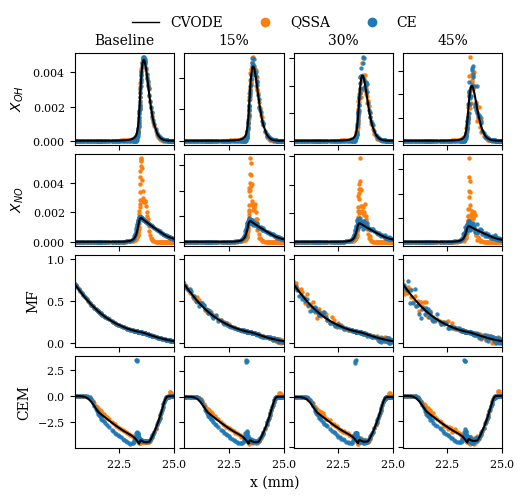

In [22]:
qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE_fortran/data/"


target_case = 'N_CF_1'
target_noise_assemble = [0.0, 0.15, 0.3, 0.45]
x_range = [20.5, 25]
file_dir = '../../data'
# Initialize subplots (len(data_cols) rows, len(target_noise_assemble) columns)
data_cols = ['OH', 'NO','MF', 'CEM']

fig, axs = plt.subplots(
    len(data_cols), 
    len(target_noise_assemble), 
    figsize=(5.7, 5), 
    sharex=True
)

# Define colors for QSSA and ILDM
# qssa_color = 'red'
# rcce_color = 'steelblue'

qssa_color = 'tab:orange'
rcce_color = 'tab:blue'


# Define y-axis ranges for each data column (optional)
range_cols = {}


# Loop through target_noise_assemble values
for j, target_noise in enumerate(target_noise_assemble):
    # Define paths
    base_case_name = 'case_NH3_counterflow'
    original_data_path = os.path.join(file_dir, base_case_name, target_case) + ".csv"
    noise_target_case = f'{target_case}_{target_noise}'

    noise_case_name = 'case_NH3_counterflow_noise'
    rcce_data_path = os.path.join(rcce_method_path, noise_case_name, noise_target_case, "predicted_X.csv")
    qssa_data_path = os.path.join(qssa_method_path, noise_case_name, noise_target_case, "predicted_X.csv")

    # Read data
    df_original = pd.read_csv(original_data_path)
    df_rcce = pd.read_csv(rcce_data_path)
    df_qssa = pd.read_csv(qssa_data_path)

    # Ensure x is a NumPy array
    x = df_original['grid'].to_numpy() * 1000  # Convert to appropriate units if necessary

    # Plot each variable in its corresponding subplot
    for i, col in enumerate(data_cols):
        ax = axs[i, j]  # rows = data_cols, columns = target_noise

        # Scatter plot for Original Data (VODE)
        ax.plot(
            x[::2],  # Sample every 3rd point for clarity
            df_original[col].to_numpy()[::2],
            label='VODE',
            alpha=1,
            color='black'
        )

        # Scatter plot for QSSA with hollow markers
        ax.scatter(
            x[::1],
            df_qssa[col].to_numpy()[::1],
            label='QSSA',
            s=10,
            alpha=1,
            marker=symbol_arr[1],
            facecolors=qssa_color,
            edgecolors=qssa_color,
            linewidths=0
        )

        # Scatter plot for ILDM with hollow markers
        ax.scatter(
            x[::1],
            df_rcce[col].to_numpy()[::1],
            label='CE',
            s=10,
            alpha=0.9,
            marker=symbol_arr[1],
            facecolors=rcce_color,
            edgecolors=rcce_color,
            linewidths=0
        )

        # Set y-axis to log scale if necessary
        if col in range_cols:
            ax.set_yscale('log')
            ax.set_ylim(range_cols[col])
        else:
            ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
            ax.yaxis.get_major_formatter().set_powerlimits((-4, 4))

        # Set y-axis label only for the leftmost column
        if j == 0:
            if col == 'CEM' or col == 'MF':
                ax.set_ylabel(col, fontsize=10)
            else: 
                ax.set_ylabel(r'$X_{' + col + '}$', fontsize=10)
        # Set x-axis limits
        ax.set_xlim(x_range)

        # Hide y-axis tick labels for all but the first column
        if j != 0:
            ax.yaxis.set_tick_params(labelleft=False)

    # Add noise column titles
    if j == 0:  # Title for the first column (Baseline)
        axs[0, j].set_title("Baseline", fontsize=10)
    else:  # Title for the other columns (Noise %)
        axs[0, j].set_title(f"{int(target_noise * 100)}%", fontsize=10)

# Custom legend
legend_handles = [
    Line2D([0], [0], color='black', label='VODE', linestyle='-', linewidth=1),  # VODE line
    Line2D([0], [0], marker=symbol_arr[1], color='w', label='QSSA',  # QSSA marker
            markerfacecolor=qssa_color, markeredgecolor=qssa_color, markersize=6, linestyle='None'),
    Line2D([0], [0], marker=symbol_arr[1], color='w', label='CE',  # ILDM marker
            markerfacecolor=rcce_color, markeredgecolor=rcce_color, markersize=6, linestyle='None')
]

fig.legend(
    handles=legend_handles,
    labels=['CVODE', 'QSSA', 'CE'],
    loc='upper center',
    bbox_to_anchor=(0.5, 0.99),
    fontsize=10,
    ncol=3,
    frameon=False
)

# Add x-axis label only once at the bottom of the whole figure
fig.text(0.5, 0.03, 'x (mm)', ha='center', va='center', fontsize=10)

# Adjust spacing
plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.89, bottom=0.1, left=0.15)

# Save the figure
fig_dir = "../../figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
print("save_fig to ",fig_dir, "/1D_CEQ_NH3_combine_x_overall.png")
plt.savefig(os.path.join(fig_dir, "1D_CEQ_NH3_combine_x_overall.pdf"), dpi=300)
plt.show()

Plot saved to figs/NH3/peak_errors/Max_Relative_Error_All_Species_Combined.pdf


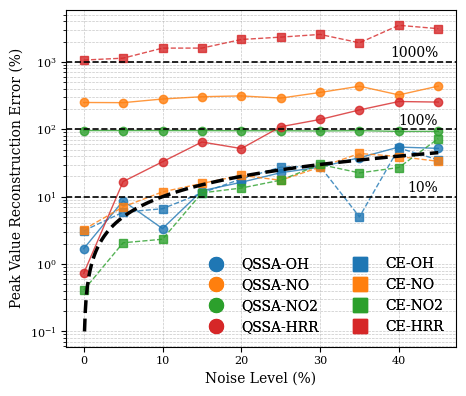

In [12]:
"""
Calculates and plots the peak relative error (%) of different species using QSSA and RCCE methods
across various noise levels on the same figure. Different species are distinguished
using different colors from color_arr, while QSSA and RCCE are differentiated by different markers and line styles.
The y-axis is set to a logarithmic scale, and reference lines at 10%, 50%, 100%, and 1000% errors are added.
Legends are organized into two distinct columns: one for QSSA and one for RCCE.
"""
# Define Method Paths

# Define color_arr, line_arr, symbol_arr
line_arr = ('-', '--', '-.', ':')
color_arr = (
    'tab:blue',    # Blue
    'tab:orange',  # Orange
    'tab:green',   # Green
    'tab:red',     # Red
    'tab:purple',  # Purple
    'tab:brown'    # Brown
)
symbol_arr = ('s', 'o', 'v', '^', '*')  # Square, Circle, Triangle Down, Triangle Up, Star

# Configuration Parameters
target_case = 'N_CF_1'
target_noise_assemble = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.40, 0.45]  # Noise levels
data_cols = ['OH', 'NO', 'NO2','Qdot']  # Updated Species columns

# Define Paths
base_case_name = 'case_NH3_counterflow'
original_data_path = os.path.join(file_dir, base_case_name, f"{target_case}.csv")
noise_case_name = 'case_NH3_counterflow_noise'

# Verify Original Data Exists
if not os.path.exists(original_data_path):
    raise FileNotFoundError(f"Original data file not found: {original_data_path}")

# Read Original Data
df_original = pd.read_csv(original_data_path)

# Initialize Dictionary to Store Errors
error_dict = {col: {'QSSA': [], 'ILDM': []} for col in data_cols}

# Iterate Over Each Noise Level
for target_noise in target_noise_assemble:
    noise_target_case = f'{target_case}_{target_noise}'
    
    # Define Predicted Data Paths
    rcce_data_path = os.path.join(rcce_method_path, noise_case_name, noise_target_case, "predicted_X.csv")
    qssa_data_path = os.path.join(qssa_method_path, noise_case_name, noise_target_case, "predicted_X.csv")
    
    # Read ILDM Predicted Data
    if os.path.exists(rcce_data_path):
        df_rcce = pd.read_csv(rcce_data_path)
    else:
        print(f"Warning: ILDM data file not found: {rcce_data_path}")
        # Append NaN for ILDM if file not found
        for col in data_cols:
            error_dict[col]['ILDM'].append(float('nan'))
        df_rcce = None

    # Read QSSA Predicted Data
    if os.path.exists(qssa_data_path):
        df_qssa = pd.read_csv(qssa_data_path)
    else:
        print(f"Warning: QSSA data file not found: {qssa_data_path}")
        # Append NaN for QSSA if file not found
        for col in data_cols:
            error_dict[col]['QSSA'].append(float('nan'))
        df_qssa = None

    # Compute Peak Relative Errors if Data Exists
    for col in data_cols:
        # Initialize errors as NaN
        error_qssa = float('nan')
        error_rcce = float('nan')
        
        # Calculate Peak Relative Error for QSSA
        if df_qssa is not None and col in df_qssa.columns and col in df_original.columns:
            original_max = df_original[col].max()
            qssa_max = df_qssa[col].max()
            if original_max != 0:
                error_qssa = np.abs((qssa_max - original_max) / original_max) * 100
            else:
                # Handle division by zero
                error_qssa = np.nan
                print(f"Warning: Original max value for species '{col}' is zero. Relative error set to NaN for QSSA.")
        else:
            print(f"Warning: Missing data for QSSA method, species '{col}' at noise level {target_noise}.")
        
        # Calculate Peak Relative Error for ILDM
        if df_rcce is not None and col in df_rcce.columns and col in df_original.columns:
            original_max = df_original[col].max()
            rcce_max = df_rcce[col].max()
            if original_max != 0:
                error_rcce = np.abs((rcce_max - original_max) / original_max) * 100
            else:
                # Handle division by zero
                error_rcce = float('nan')
                print(f"Warning: Original max value for species '{col}' is zero. Relative error set to NaN for ILDM.")
        else:
            print(f"Warning: Missing data for ILDM method, species '{col}' at noise level {target_noise}.")

        # Append Errors to Dictionary
        error_dict[col]['QSSA'].append(error_qssa)
        error_dict[col]['ILDM'].append(error_rcce)

# Prepare Noise Levels for Plotting (Convert to Percentage)
noise_levels_percent = [n * 100 for n in target_noise_assemble]

# Initialize Plot
plt.figure(figsize=(4.7, 4))  # Original figure size

# Define Colors for Species from color_arr
species_colors = {col: color_arr[i % len(color_arr)] for i, col in enumerate(data_cols)}

# Define Markers and Line Styles for Methods
method_styles = {
    'QSSA': {'marker': 'o', 'linestyle': '-'},    # Circle marker with solid line
    'ILDM': {'marker': 's', 'linestyle': '--'},  # Square marker with dashed line
    # Add more methods and their styles here if needed
}

# Plotting each species-method combination
for col in data_cols:
    for method in ['QSSA', 'ILDM']:
        errors = error_dict[col][method]
        color = species_colors.get(col, 'gray')  # Default color if not specified
        style = method_styles.get(method, {'marker': 'D', 'linestyle': '-'})  # Default styles
        marker = style['marker']
        linestyle = style['linestyle']
        
        # Assign label only once per species-method combination to avoid duplicate legend entries
        label = None  # Labels are managed in the custom legends
        
        plt.plot(
            noise_levels_percent,
            errors,
            marker=marker,
            linestyle=linestyle,
            color=color,
            markersize=6,
            linewidth=1,
            alpha=0.8
        )

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add reference lines at 10%, 50%, 100%, and 1000% relative errors
for ref_error in [10, 100, 1000]:
    plt.axhline(y=ref_error, color='black', linestyle='--', linewidth=1.2)
    # Position the text slightly above the reference line and aligned to the right
    plt.text(
        noise_levels_percent[-1],
        ref_error * 1.05,
        f'{ref_error}%',
        color='black',
        fontsize=10,
        verticalalignment='bottom',
        horizontalalignment='right'
    )

# *** Add the y = x Reference Line ***
# To avoid issues with log scale at y=0, start from a small positive value
all_errors = [
    err for col in data_cols 
    for err in error_dict[col]['QSSA'] + error_dict[col]['ILDM']
    if not np.isnan(err)
]

if not all_errors:
    y_min = 0.1
    y_max = 45
else:
    y_min = max(0.1, np.nanmin(all_errors))
    y_max = max(np.nanmax(all_errors), 45)  # Ensure it covers noise_levels_percent

# Define range for x based on noise_levels_percent
x_values = np.linspace(0.1, max(noise_levels_percent), 500)
y_values = x_values  # y = x

plt.plot(
    x_values,
    y_values,
    color='black',
    linestyle='--',
    linewidth=2.5,
)

# Customize Plot
plt.xlabel('Noise Level (%)', fontsize=10)
plt.ylabel('Peak Value Reconstruction Error (%)', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# *** Create Custom Legends ***
# Separate handles for QSSA and RCCE
qssa_handles = []
rcce_handles = []

for species, color in species_colors.items():
    # QSSA Handle
    if species=="Qdot":
        q_label = f"QSSA-HRR"
    else: 
        q_label = f"QSSA-{species}"
    
    q_handle = Line2D(
        [0], [0],
        marker=method_styles['QSSA']['marker'],
        color='w',
        label=q_label,
        markerfacecolor=color,
        markeredgecolor=color,
        markersize=10,
        linestyle='None'  # No line, only marker
    )
    qssa_handles.append(q_handle)
    
    # RCCE Handle
    if species=="Qdot":
        r_label = f"CE-HRR"
    else:
        r_label = f"CE-{species}"
    r_handle = Line2D(
        [0], [0],
        marker=method_styles['ILDM']['marker'],
        color='w',
        label=r_label,
        markerfacecolor=color,
        markeredgecolor=color,
        markersize=10,
        linestyle='None'  # No line, only marker
    )
    rcce_handles.append(r_handle)

# Combine handles: first QSSA, then RCCE
combined_handles = qssa_handles + rcce_handles
combined_labels = [handle.get_label() for handle in combined_handles]

# Create the legend with 2 columns
species_legend = plt.legend(
    handles=combined_handles,
    labels=combined_labels,
    loc='lower right',
    fontsize=10,
    ncol=2,
    frameon=False
)
# Add the legend to the plot
plt.gca().add_artist(species_legend)

# Adjust Layout to prevent overlap
plt.tight_layout()

# Create Directory for Saving Figures
fig_dir = os.path.join("figs", "NH3", "peak_errors")
os.makedirs(fig_dir, exist_ok=True)

# Save the Figure
output_path = os.path.join(fig_dir, "Max_Relative_Error_All_Species_Combined.pdf")
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")

# Display the Plot
plt.show()

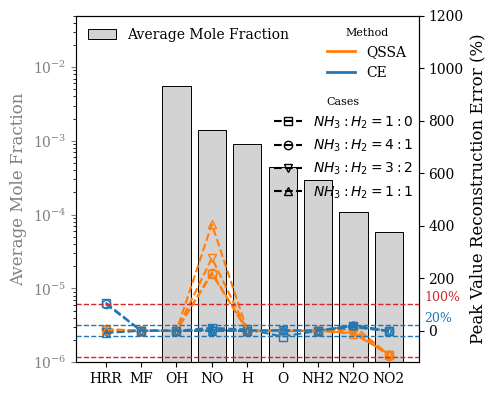

In [13]:
# Define target cases
base_case_name = "case_NH3_counterflow"
# case_name = "case_NH3_counterflow"
case_name = "case_NH3_counterflow_OH_NH2"


qssa_method_path = "../../figs/QSSA/data/"
rcce_method_path = "../../figs/RCCE_fortran/data/"
# Updated color array as per user specification
color_arr = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
]

line_arr = ('-', '--', '-.', ':')
symbol_arr = ('s', 'o', 'v', '^', '*')
fixed_line_style = '--'  # Solid line for all cases

target_case_assemble = [
    'N_CF_0',
    'N_CF_1',
    'N_CF_2',
    'N_CF_3',
    # 'N_CF_4',
    # 'N_CF_5',
    # 'N_CF_6',
    # 'N_CF_7',
    # 'N_CF_8',
]

# Corresponding phi labels for legend
name_case_assemble = [
    r'$NH_{3}:H_{2} = 1:0$',
    r'$NH_{3}:H_{2} = 4:1$',
    r'$NH_{3}:H_{2} = 3:2$',
    r'$NH_{3}:H_{2} = 1:1$',
    # r'$NH_{3}:H_{2} = 0:1$',
    
]

# Initialize a Series to accumulate species data
all_species_data = pd.Series(dtype=float)
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(5, 4))  # Increased figsize for better clarity

# Define columns to keep
# keep_cols = ['Qdot','MF', 'OH', 'NO', 'H', 'O', 'NH2', 'N2O', 'NO2', 'NH', 'N2H2', 'N']
keep_cols = ['Qdot','MF', 'OH', 'NO', 'H', 'O', 'NH2', 'N2O', 'NO2']

# Loop to accumulate maximum species data across all cases
for j, target_case in enumerate(target_case_assemble):
    original_data_path = os.path.join(file_dir, base_case_name, target_case) + ".csv"
    qssa_data_path = os.path.join(qssa_method_path, case_name, target_case, "predicted_X.csv")
    rcce_data_path = os.path.join(rcce_method_path, case_name, target_case, "predicted_X.csv")

    # Read data with error handling
    try:
        df_original = pd.read_csv(original_data_path)
        df_qssa = pd.read_csv(qssa_data_path)
        df_rcce = pd.read_csv(rcce_data_path)  # Read RCCE data
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        continue

    # Keep only the specified columns
    species_data = df_original[keep_cols]
    qssa_species_data = df_qssa[keep_cols]
    rcce_species_data = df_rcce[keep_cols]  # Keep RCCE species data

    # Accumulate maximum species data
    all_species_data = all_species_data.add(species_data.max(), fill_value=0)

# Calculate the average mole fraction for each species across all cases
average_mole_fractions = all_species_data / len(target_case_assemble)

# Sort species by decreasing average mole fraction
sorted_species = average_mole_fractions.sort_values(ascending=False)

# Create a separate copy for the bar plot and set 'Qdot' and 'MF' to 0
sorted_species_bar = sorted_species.copy()
sorted_species_bar.loc['Qdot'] = 0
sorted_species_bar.loc['MF'] = 0

# Rename 'Qdot' to 'HRR' and 'MF' to 'MF' for labeling in bar plot
sorted_species_bar.rename(index={'Qdot': 'HRR', 'MF': 'MF'}, inplace=True)  # Fixed renaming for 'MF'

# Bar plot for the average mole fraction using sorted_species_bar
ax1.bar(
    range(len(sorted_species_bar)),  # Numeric x positions
    sorted_species_bar.values,
    edgecolor='black',
    facecolor='lightgray',  # Changed from 'skyblue' to 'lightgray' for distinction
    linewidth=0.7,
    label='Average Mole Fraction'
)
ax1.spines['left'].set_color('gray')
ax1.set_ylabel("Average Mole Fraction", fontsize=12, color='gray')
ax1.set_yscale("log")
ax1.set_ylim(1e-6, 5e-2)  # Set y-axis range
ax1.tick_params(axis='x', rotation=0, labelsize=10)  # Rotated labels for better readability
ax1.tick_params(axis='y', labelsize=10, colors='gray')

# Set x-axis labels: 'HRR' and 'MF' along with others if present
new_labels = sorted_species_bar.index.tolist()
ax1.set_xticks(range(len(sorted_species_bar)))
ax1.set_xticklabels(new_labels, rotation=0, fontsize=10)  # Rotated for clarity

# Create a secondary y-axis once, outside the loop
ax2 = ax1.twinx()

# Define method colors
method_colors = {
    'QSSA': 'tab:orange',
    'RCCE': 'tab:blue'
}

# Initialize lists to store legend handles and labels for methods and cases
method_handles = []
method_labels = []
case_handles = []
case_labels = []

# Loop to plot the max ratio error for each target case and each method
for j, target_case in enumerate(target_case_assemble):
    original_data_path = os.path.join(file_dir, base_case_name, target_case) + ".csv"
    qssa_data_path = os.path.join(qssa_method_path, case_name, target_case, "predicted_X.csv")
    rcce_data_path = os.path.join(rcce_method_path, case_name, target_case, "predicted_X.csv")

    # Read data with error handling
    try:
        df_original = pd.read_csv(original_data_path)
        df_qssa = pd.read_csv(qssa_data_path)
        df_rcce = pd.read_csv(rcce_data_path)
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        continue

    species_data = df_original[keep_cols]
    qssa_species_data = df_qssa[keep_cols]
    rcce_species_data = df_rcce[keep_cols]

    # Calculate the max ratio error for QSSA
    with np.errstate(divide='ignore', invalid='ignore'):
        max_ratio_error_qssa = ((qssa_species_data.max() - species_data.max()) / species_data.max()) * 100
        max_ratio_error_qssa.replace([np.inf, -np.inf], np.nan, inplace=True)
        max_ratio_error_qssa.fillna(0, inplace=True)

    # Calculate the max ratio error for RCCE
    with np.errstate(divide='ignore', invalid='ignore'):
        max_ratio_error_rcce = ((rcce_species_data.max() - species_data.max()) / species_data.max()) * 100
        max_ratio_error_rcce.replace([np.inf, -np.inf], np.nan, inplace=True)
        max_ratio_error_rcce.fillna(0, inplace=True)

    # Map 'HRR' and 'X' back to 'Qdot' and 'MF' for the line plots
    max_ratio_error_qssa_mapped = max_ratio_error_qssa.copy()
    max_ratio_error_qssa_mapped = max_ratio_error_qssa_mapped.rename(index={'HRR': 'Qdot', 'X': 'MF'})

    max_ratio_error_rcce_mapped = max_ratio_error_rcce.copy()
    max_ratio_error_rcce_mapped = max_ratio_error_rcce_mapped.rename(index={'HRR': 'Qdot', 'X': 'MF'})

    # **Modification Start: Skip the first species ('Qdot') when plotting RCCE errors**
    if len(max_ratio_error_rcce_mapped) > 0:
        rcce_errors = max_ratio_error_rcce_mapped.copy()
        # rcce_errors.iloc[0] = np.nan  # Set the first specie  s ('Qdot') error to NaN to skip plotting
        rcce_errors.iloc[1] = 0 # np.nan  # Set the first specie  s ('Qdot') error to NaN to skip plotting
    
# **Modification End**

    # Assign unique line style and marker for each case
    line_style = fixed_line_style
    marker = symbol_arr[j % len(symbol_arr)]

    # Plot QSSA error on ax2
    line_qssa, = ax2.plot(
        range(len(sorted_species_bar)),  # Numeric x positions
        max_ratio_error_qssa_mapped.values,
        marker=marker,
        linestyle=line_style,
        color=method_colors['QSSA'],
        markerfacecolor='none',  # Hollow marker
        label=f'{name_case_assemble[j]} QSSA',
        linewidth=1.5,
        markersize=6
    )

    # Plot RCCE error on ax2, skipping the first species
    line_rcce, = ax2.plot(
        range(len(sorted_species_bar)),  # Numeric x positions
        rcce_errors.values,  # RCCE errors with first species set to NaN
        marker=marker,
        linestyle=line_style,
        color=method_colors['RCCE'],
        markerfacecolor='none',  # Hollow marker
        label=f'{name_case_assemble[j]} CE',
        linewidth=1.5,
        markersize=6
    )

    # Collect handles for legends
    # Add method handles only once
    if j == 0:
        method_handles.append(Line2D([0], [0], color=method_colors['QSSA'], lw=2, label='QSSA'))
        method_handles.append(Line2D([0], [0], color=method_colors['RCCE'], lw=2, label='CE'))
        method_labels.extend(['QSSA', 'CE'])

    # Add case handles only once
    if j < len(name_case_assemble):
        case_handles.append(Line2D([0], [0], color='black', linestyle=line_style, marker=marker, 
                                    markerfacecolor='none', label=name_case_assemble[j]))
        case_labels.append(name_case_assemble[j])

# Set labels and limits for ax2
ax2.set_ylabel("Peak Value Reconstruction Error (%)", fontsize=12)
ax2.set_ylim(-120, 1200)  # Adjust the range as needed
ax2.tick_params(axis='y', labelsize=10)

# Add ±20% and ±100% error lines with annotations
error_lines = [
    (20, 'tab:blue', '20%'),
    (-20, 'tab:blue', ''),
    (100, 'tab:red', '100%'),
    (-100, 'tab:red', ''),
]

for y, color, label_text in error_lines:
    ax2.axhline(y=y, color=color, linestyle='--', linewidth=1)
    # Position the text slightly to the left of the last bar
    ax2.text(len(sorted_species_bar), y, label_text, color=color, fontsize=9, 
                verticalalignment='bottom' if y > 0 else 'top')

# Create custom legends
# Method Legend
method_legend = ax2.legend(handles=method_handles, labels=method_labels, loc='upper right', 
                            title='Method', frameon=False, fontsize=10)
# Case Legend positioned below the Method Legend
case_legend = ax2.legend(handles=case_handles, labels=case_labels, loc='upper right', 
                            title='Cases', frameon=False, fontsize=10, bbox_to_anchor=(1.02, 0.80))
# Add the method legend back to the axes
ax2.add_artist(method_legend)

# Optionally, add a legend for the bar plot (ax1)
bar_legend = ax1.legend(loc='upper left', frameon=False, fontsize=10)
bar_legend.get_texts()[0].set_color('black')  # Match the bar color

# Set the tick label fontweight and size for ax2 to match ax1
for label in ax2.get_yticklabels():
    label.set_fontweight('normal')
    label.set_fontsize(10)  # Ensure the font size matches ax1

# Ensure ax1 tick labels also have normal font weight and size
for label in ax1.get_yticklabels():
    label.set_fontweight('normal')
    label.set_fontsize(10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
fig_dir = "../../figs/NH3"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "Average_Mole_Fraction_with_Max_Ratio_Error.pdf"), dpi=300)
plt.savefig(os.path.join(fig_dir, "Average_Mole_Fraction_with_Max_Ratio_Error.png"), dpi=300)

plt.show()
plt.close(fig)
